In [239]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from matplotlib import font_manager

font_dirs = ['style/fonts/']
font_files = font_manager.findSystemFonts(fontpaths=font_dirs)

for font_file in font_files:
    font_manager.fontManager.addfont(font_file)

plt.style.use('default')
plt.style.use('style/style.mplstyle')

In [240]:
df = pd.read_csv('../data/fenomeno/stereotipi/Opinioni su ruoli tradizionali - età (2018).csv')
df = df[["SEXISTAT1", "Classe di età", "Stereotipi sui ruoli di genere, comportamenti nella coppia", "Grado di accordo", "Value"]]
df.head()

,SEXISTAT1,Classe di età,"Stereotipi sui ruoli di genere, comportamenti nella coppia",Grado di accordo,Value
0,M,30-44 anni,"in condizioni di scarsità di lavoro,i datori d...",molto d'accordo,4.6
1,M,30-44 anni,è soprattutto l'uomo che deve provvedere alle ...,molto d'accordo,12.0
2,M,30-44 anni,è l'uomo che deve prendere le decisioni più im...,molto d'accordo,4.7
3,M,30-44 anni,gli uomini sono meno adatti ad occuparsi delle...,molto d'accordo,10.2
4,M,30-44 anni,"per l’uomo,più che per la donna,è molto import...",molto d'accordo,10.6


In [241]:
df_male = df[(df["SEXISTAT1"] == "M") & (df["Grado di accordo"] != "totale")]
df_female = df[(df["SEXISTAT1"] == "F") & (df["Grado di accordo"] != "totale")]

df_female.head()

,SEXISTAT1,Classe di età,"Stereotipi sui ruoli di genere, comportamenti nella coppia",Grado di accordo,Value
5,F,30-44 anni,"in condizioni di scarsità di lavoro,i datori d...",molto d'accordo,4.1
6,F,30-44 anni,è soprattutto l'uomo che deve provvedere alle ...,molto d'accordo,5.6
7,F,30-44 anni,è l'uomo che deve prendere le decisioni più im...,molto d'accordo,2.0
8,F,30-44 anni,gli uomini sono meno adatti ad occuparsi delle...,molto d'accordo,10.7
9,F,30-44 anni,"per l’uomo,più che per la donna,è molto import...",molto d'accordo,10.4


In [242]:
df_male_tot = df_male[df_male["Classe di età"] == "totale"]#.sort_values(by='STEREOTIPI')
df_female_tot = df_female[df_female["Classe di età"] == "totale"]#.sort_values(by='STEREOTIPI')

df_male_tot.head(10)

,SEXISTAT1,Classe di età,"Stereotipi sui ruoli di genere, comportamenti nella coppia",Grado di accordo,Value
90,M,totale,"in condizioni di scarsità di lavoro,i datori d...",molto d'accordo,5.1
91,M,totale,è soprattutto l'uomo che deve provvedere alle ...,molto d'accordo,11.4
92,M,totale,è l'uomo che deve prendere le decisioni più im...,molto d'accordo,4.4
93,M,totale,gli uomini sono meno adatti ad occuparsi delle...,molto d'accordo,10.0
94,M,totale,"per l’uomo,più che per la donna,è molto import...",molto d'accordo,9.3
105,M,totale,"in condizioni di scarsità di lavoro,i datori d...",abbastanza d'accordo,10.4
106,M,totale,è soprattutto l'uomo che deve provvedere alle ...,abbastanza d'accordo,20.0
107,M,totale,è l'uomo che deve prendere le decisioni più im...,abbastanza d'accordo,6.3
108,M,totale,gli uomini sono meno adatti ad occuparsi delle...,abbastanza d'accordo,20.6
109,M,totale,"per l’uomo,più che per la donna,è molto import...",abbastanza d'accordo,21.0


In [243]:
order = ["molto d'accordo","abbastanza d'accordo", "poco d'accordo", "per niente d'accordo"]
male_colors = ["#045a8d","#2b8cbe","#74a9cf","#bdc9e1","#f1eef6"]
female_colors = ["#980043","#dd1c77","#df65b0","#d7b5d8","#f1eef6"]

In [244]:
df_male_tot_pivot = df_male_tot.pivot(index="Stereotipi sui ruoli di genere, comportamenti nella coppia", columns="Grado di accordo", values="Value")[order]
df_female_tot_pivot = df_female_tot.pivot(index="Stereotipi sui ruoli di genere, comportamenti nella coppia", columns="Grado di accordo", values="Value")[order]
df_male_tot_pivot

Grado di accordo,molto d'accordo,abbastanza d'accordo,poco d'accordo,per niente d'accordo
"Stereotipi sui ruoli di genere, comportamenti nella coppia",,,,
gli uomini sono meno adatti ad occuparsi delle faccende domestiche,10.0,20.6,21.8,47.0
"in condizioni di scarsità di lavoro,i datori di lavoro dovrebbero dare la precedenza agli uomini rispetto alle donne",5.1,10.4,13.3,70.4
"per l’uomo,più che per la donna,è molto importante avere successo nel lavoro",9.3,21.0,17.1,51.4
è l'uomo che deve prendere le decisioni più importanti riguardanti la famiglia,4.4,6.3,13.4,75.4
è soprattutto l'uomo che deve provvedere alle necessità economiche della famiglia,11.4,20.0,17.1,50.9


[]

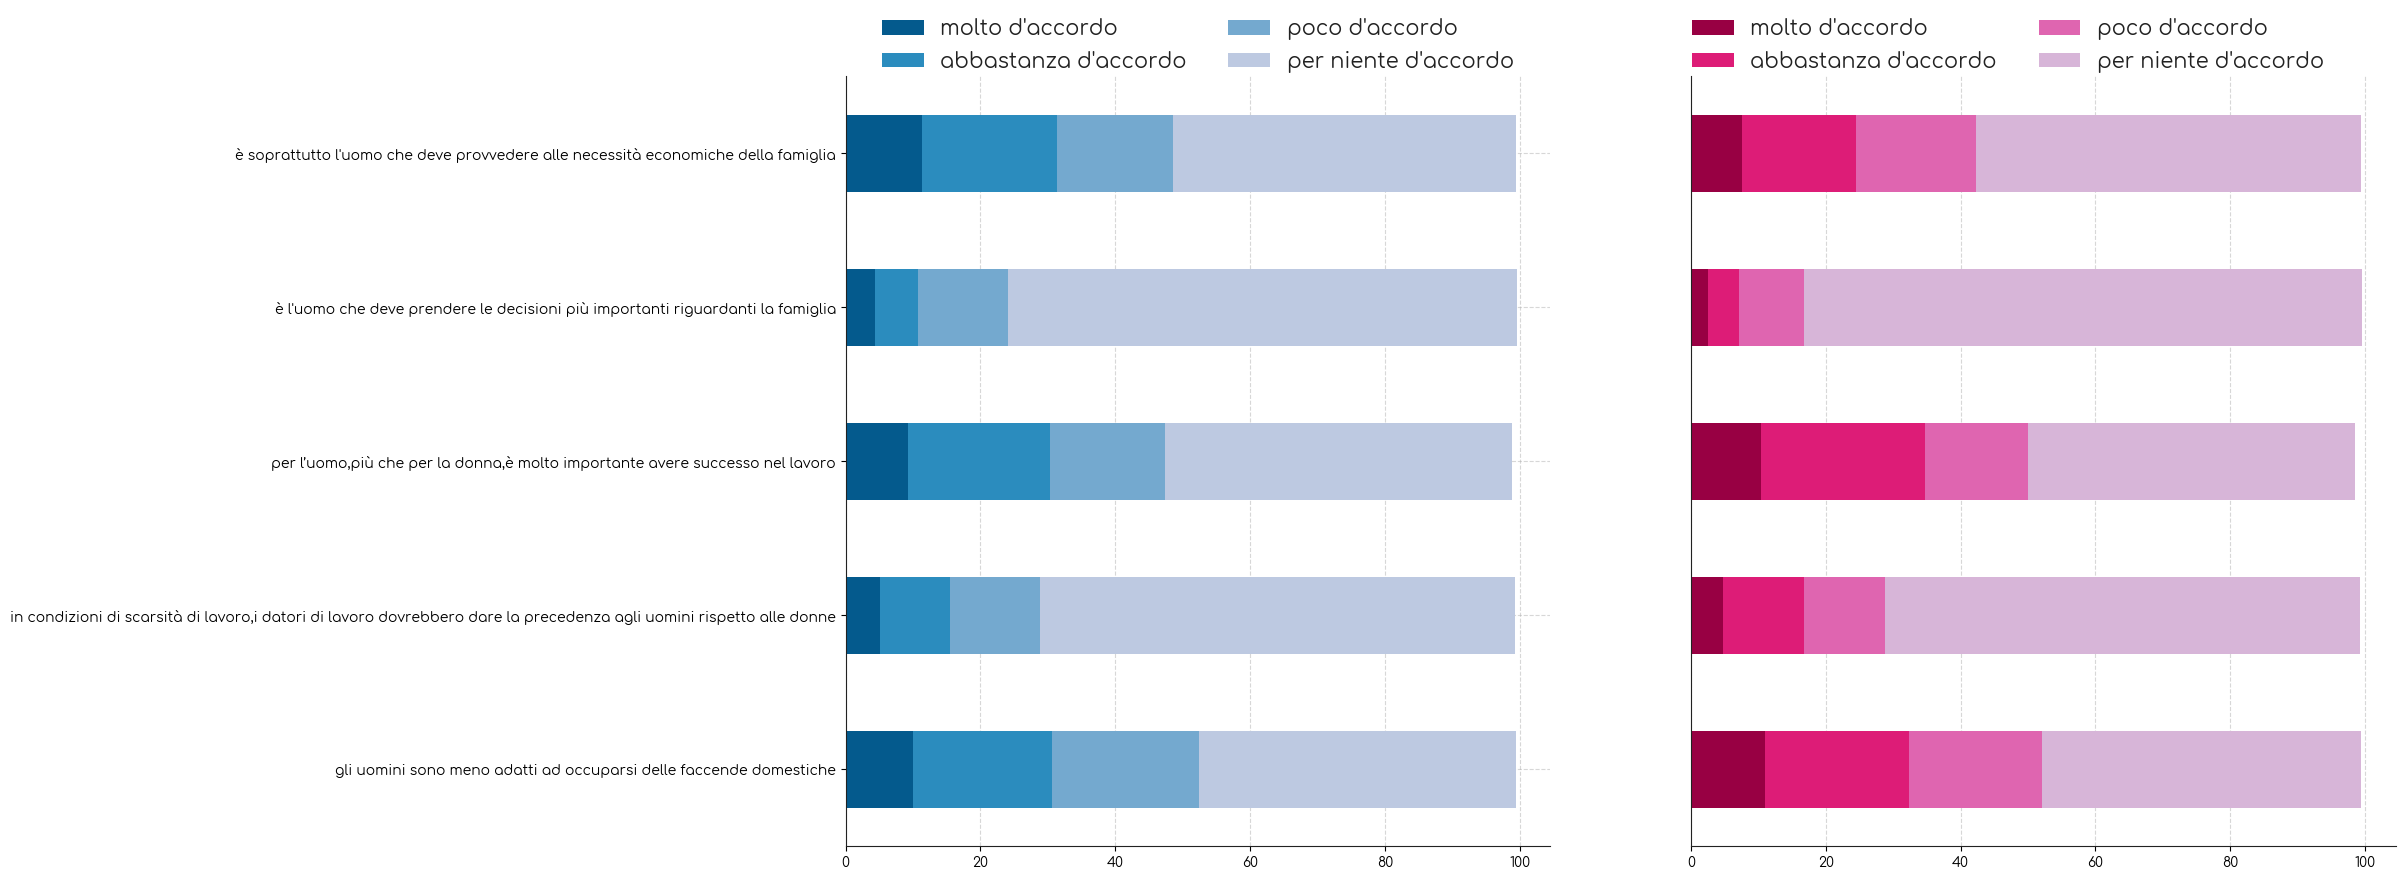

In [245]:
plt.figure(figsize=(20,10))

ax = plt.subplot(121)
df_male_tot_pivot.plot.barh(stacked=True, color=male_colors, ax=ax)
plt.legend(loc="upper center",bbox_to_anchor=(0.5, 1.1), ncol=2, fontsize=15, shadow=False, framealpha=0)
plt.ylabel("")
plt.grid()

ax = plt.subplot(122)

df_female_tot_pivot.plot.barh(stacked=True, color=female_colors, ax=ax)
plt.legend(loc="upper center",bbox_to_anchor=(0.45, 1.1), ncol=2, fontsize=15, shadow=False, framealpha=0)
plt.yticks([])
plt.ylabel("")
plt.grid()

plt.plot()

In [252]:
def plot_clustered_stacked(dfall, labels=None, title="multiple stacked bar plot",  H="/", colors=None, legend_colors=None, figsize=(10,10)):
    """Given a list of dataframes, with identical columns and index, create a clustered stacked bar plot. 
labels is a list of the names of the dataframe, used for the legend
title is a string for the title of the plot
H is the hatch used for identification of the different dataframe"""

    n_df = len(dfall)
    n_col = len(dfall[0].columns) 
    n_ind = len(dfall[0].index)
    fig, axe = plt.subplots(figsize=figsize)

    for i, df in enumerate(dfall) : # for each data frame
        axe = df.plot(kind="barh",
                      linewidth=0,
                      stacked=True,
                      ax=axe,
                      legend=False,
                      grid=False,
                      color=colors[i])  # make bar plots

    h,l = axe.get_legend_handles_labels() # get the handles we want to modify
    for i in range(0, n_df * n_col, n_col): # len(h) = n_col * n_df
        for j, pa in enumerate(h[i:i+n_col]):
            for rect in pa.patches: # for each index
                rect.set_y(rect.get_y() + 1 / float(n_df + 1) * i / float(n_col))
                # rect.set_hatch(H * int(i / n_col)) #edited part     
                rect.set_height(1 / float(n_df + 1))

    axe.set_yticks((np.arange(0, 2 * n_ind, 2) + 1 / float(n_df + 1)) / 2.)
    axe.set_yticklabels(df.index, rotation = 0)
    axe.set_title(title)

    # Add invisible data to add another legend
    n=[]        
    for i in range(n_df):
        n.append(axe.bar(0, 0, color=legend_colors[i], hatch=H * i))

    # l1 = axe.legend(h[:n_col], l[:n_col], loc=[1.01, 0.6])
    if labels is not None:
        l2 = plt.legend(n, labels, loc=[1.01, 0.4]) 
    axe.add_artist(l2)
    return axe

In [247]:
labels = df_male_tot_pivot.index
labels

Index(['gli uomini sono meno adatti ad occuparsi delle faccende domestiche',
       'in condizioni di scarsità di lavoro,i datori di lavoro dovrebbero dare la precedenza agli uomini rispetto alle donne',
       'per l’uomo,più che per la donna,è molto importante avere successo nel lavoro',
       'è l'uomo che deve prendere le decisioni più importanti riguardanti la famiglia',
       'è soprattutto l'uomo che deve provvedere alle necessità economiche della famiglia'],
      dtype='object', name='Stereotipi sui ruoli di genere, comportamenti nella coppia')

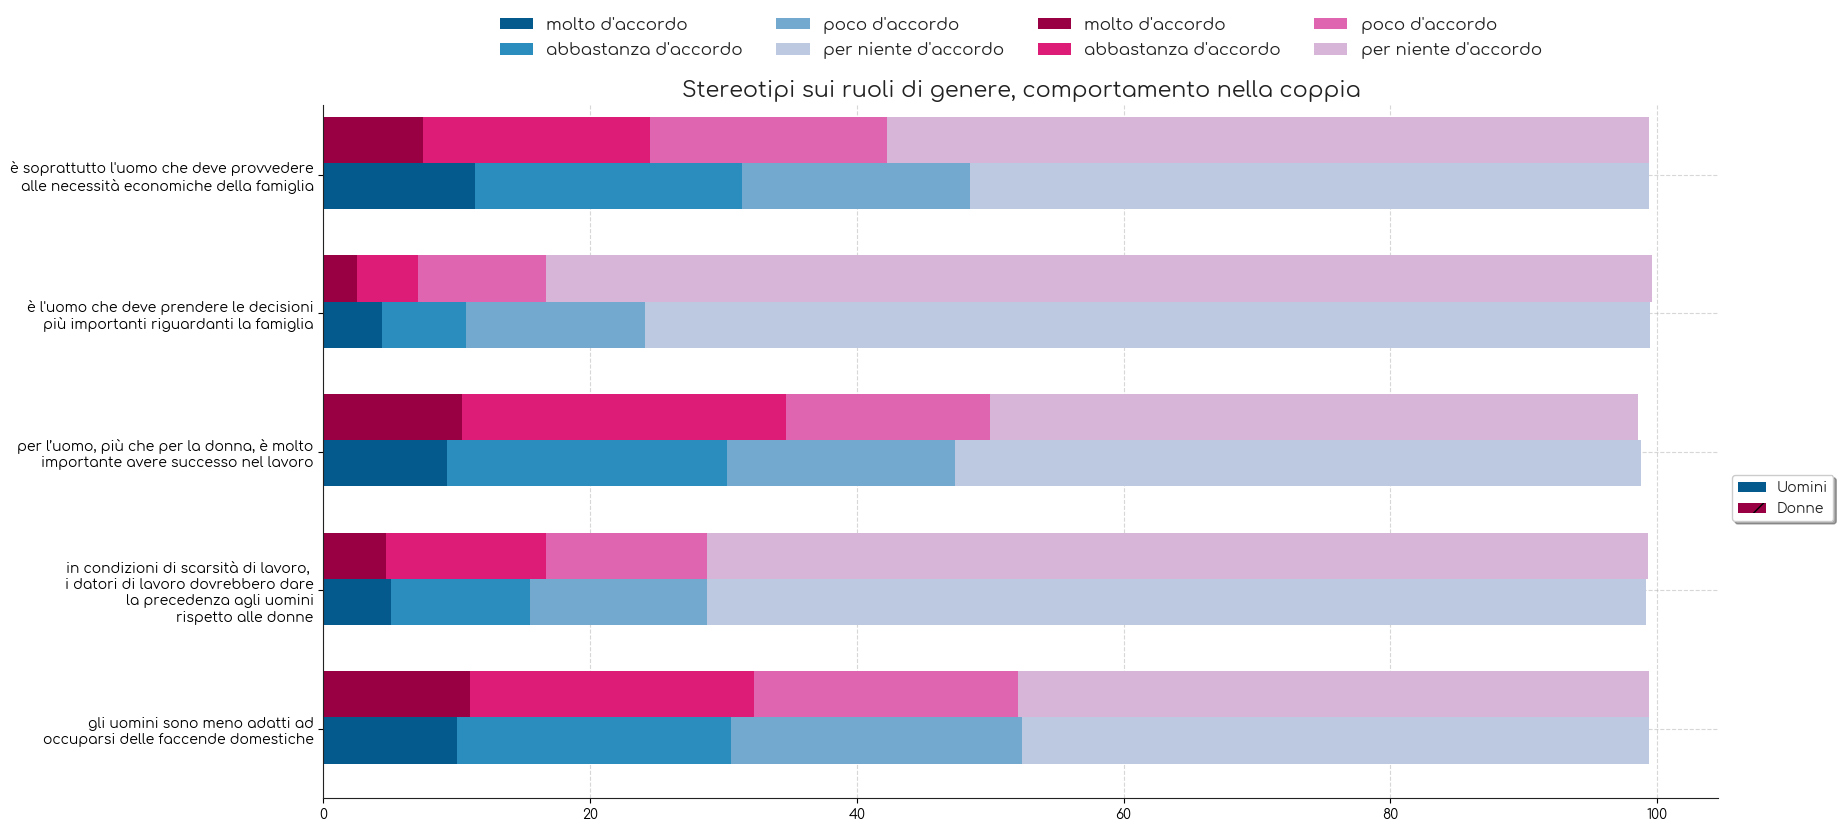

In [256]:
labels_edited = ["gli uomini sono meno adatti ad\noccuparsi delle faccende domestiche",
       "in condizioni di scarsità di lavoro, \ni datori di lavoro dovrebbero dare\nla precedenza agli uomini\nrispetto alle donne",
       "per l’uomo, più che per la donna, è molto\nimportante avere successo nel lavoro",
       "è l'uomo che deve prendere le decisioni\npiù importanti riguardanti la famiglia",
       "è soprattutto l'uomo che deve provvedere\nalle necessità economiche della famiglia"]

plot_clustered_stacked([df_male_tot_pivot, df_female_tot_pivot],["Uomini", "Donne"],
                       colors=[male_colors,female_colors],
                       legend_colors=[male_colors[0], female_colors[0]],
                       title="Stereotipi sui ruoli di genere, comportamento nella coppia",
                       figsize=(18,9))

plt.legend(loc="upper center",bbox_to_anchor=(0.5, 1.15), ncol=4, fontsize=12, shadow=False, frameon=False)
plt.ylabel("")
plt.grid()
plt.xlim(left=0)
plt.yticks(np.arange(5), labels_edited)
plt.show()